In [3]:
%pwd

'c:\\projects\\HealthCare-Pulmonary-diagnosis\\Research'

In [4]:
import os
os.chdir('../')
%pwd

'c:\\projects\\HealthCare-Pulmonary-diagnosis'

In [5]:
import tensorflow as tf
from tensorflow.keras.applications.efficientnet import preprocess_input
from CNN_Classifier.utils.common import read_yaml

params = read_yaml("params.yaml")


In [45]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    directory='artifacts\\data_transformation\\transformed_train',
    labels='inferred',
    label_mode='categorical',
    batch_size=params['BATCH_SIZE'],
    image_size=params['TARGET_IMAGE_SIZE'],
    shuffle=True,
    seed=params['SEED']
)
val_ds=tf.keras.utils.image_dataset_from_directory(
    directory='artifacts\\data_transformation\\transformed_valid',
    labels='inferred',
    label_mode='categorical',
    batch_size=params['BATCH_SIZE'],
    image_size=params['TARGET_IMAGE_SIZE'],
    shuffle=False,
    seed=params['SEED']
)


Found 613 files belonging to 4 classes.
Found 72 files belonging to 4 classes.


Image shape: (224, 224, 3)
Label vector: [0. 0. 1. 0.]
Label index: 2


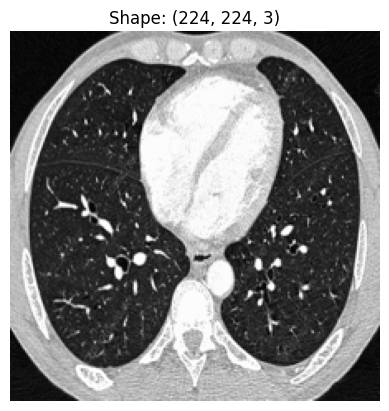

In [46]:
import matplotlib.pyplot as plt
import numpy as np

for images, labels in train_ds.take(1):
    img = images[0].numpy()
    label = labels[0].numpy()

    print("Image shape:", img.shape)        # (224, 224, 3)
    print("Label vector:", label)           # one-hot vector
    print("Label index:", np.argmax(label)) # class index

    plt.imshow(img.astype("uint8"))
    plt.title(f"Shape: {img.shape}")
    plt.axis("off")
    plt.show()

In [47]:
# preprocess the dataset 
augmentation_layer = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomGaussianBlur(0.1),
    tf.keras.layers.RandomZoom(height_factor=0.05, width_factor=0.05),
])
train_ds = train_ds.map(lambda x, y: (augmentation_layer(x, training=True), y))
train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y), num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y), num_parallel_calls=tf.data.AUTOTUNE)

In [49]:
import numpy as np
import random

# Take one batch
for images, labels in train_ds.take(1):
    idx = random.randint(0, images.shape[0] - 1)
    img = images[idx].numpy()

    print("Image shape:", img.shape)
    print("Image dtype:", img.dtype)

    np.set_printoptions(threshold=100)  # limit printing
    print("Pixel matrix sample:\n", img[:5, :5, :])  # show top-left 5x5 pixels

Image shape: (224, 224, 3)
Image dtype: float32
Pixel matrix sample:
 [[[ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.30354396  0.30354396  0.30354396]
  [ 2.4788618   2.4788618   2.4788618 ]
  [ 7.2212877   7.2212877   7.2212877 ]]

 [[ 2.4861605   2.4861605   2.4861605 ]
  [ 8.825417    8.825417    8.825417  ]
  [12.751312   12.751312   12.751312  ]
  [16.246592   16.246592   16.246592  ]
  [15.277137   15.277137   15.277137  ]]

 [[14.628256   14.628256   14.628256  ]
  [16.41744    16.41744    16.41744   ]
  [15.33516    15.33516    15.33516   ]
  

In [50]:
model_transfer_learning=tf.keras.models.load_model('artifacts\\base_model\\updated_model.keras')
model_transfer_learning.fit(train_ds,
                             validation_data=val_ds,
                               epochs=30, callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True))


Epoch 1/30


c:\projects\HealthCare-Pulmonary-diagnosis\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 385ms/step - f1_score: 0.4320 - loss: 3.2310 - val_f1_score: 0.5942 - val_loss: 0.8836
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 296ms/step - f1_score: 0.6532 - loss: 0.7511 - val_f1_score: 0.6917 - val_loss: 0.7299
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 329ms/step - f1_score: 0.7455 - loss: 0.5859 - val_f1_score: 0.5464 - val_loss: 0.9737
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 328ms/step - f1_score: 0.7865 - loss: 0.4898 - val_f1_score: 0.6059 - val_loss: 0.8304
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 342ms/step - f1_score: 0.8422 - loss: 0.4233 - val_f1_score: 0.7374 - val_loss: 0.8134
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 346ms/step - f1_score: 0.8499 - loss: 0.3594 - val_f1_score: 0.7565 - val_loss: 0.7076
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 331ms/step - f1_score: 0.8619 - loss: 0.3297 - val_f1_score: 0.7305 - val_loss: 0.8096
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 328ms/step - f1_score: 0.8863 - loss: 0.3033 - val_f1_score: 0.6592 - val

# Hybrid learning

In [6]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    directory='artifacts\\data_transformation\\transformed_train',
    labels='inferred',
    label_mode='int',
    batch_size=params['BATCH_SIZE'],
    image_size=params['TARGET_IMAGE_SIZE'],
    shuffle=True,
    seed=params['SEED']
)
val_ds=tf.keras.utils.image_dataset_from_directory(
    directory='artifacts\\data_transformation\\transformed_valid',
    labels='inferred',
    label_mode='int',
    batch_size=params['BATCH_SIZE'],
    image_size=params['TARGET_IMAGE_SIZE'],
    shuffle=False,
    seed=params['SEED']
)
train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y), num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y), num_parallel_calls=tf.data.AUTOTUNE)


Found 613 files belonging to 4 classes.
Found 72 files belonging to 4 classes.


In [7]:
feature_extractor = tf.keras.models.load_model(
    "artifacts/base_model/feature_extract_model.keras"
)
print("Feature extractor output:", feature_extractor.output_shape)  # should be (None, 1280)

Feature extractor output: (None, 1280)


In [14]:
import numpy as np

def extract_features(ds, model):
    X_list, y_list = [], []
    for xb, yb in ds:
        feats = model(xb, training=False).numpy()   # (B, 1280)
        X_list.append(feats)
        y_list.append(yb.numpy())                  # ints
    X = np.concatenate(X_list, axis=0)
    y = np.concatenate(y_list, axis=0)
    return X, y

X_train, y_train = extract_features(train_ds, feature_extractor)
X_val, y_val     = extract_features(val_ds, feature_extractor)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(613, 1280) (613,)
(72, 1280) (72,)


In [15]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score
from sklearn.svm import SVC



In [16]:

def report_f1(clf, X_train, y_train, X_val, y_val):
    # Predictions
    pred_train = clf.predict(X_train)
    pred_val   = clf.predict(X_val)

    # F1 scores
    train_f1_macro = f1_score(y_train, pred_train, average="macro")
    val_f1_macro   = f1_score(y_val, pred_val, average="macro")

    train_f1_weighted = f1_score(y_train, pred_train, average="weighted")
    val_f1_weighted   = f1_score(y_val, pred_val, average="weighted")

    print(f"Train F1 (macro):    {train_f1_macro:.4f}")
    print(f"Valid F1 (macro):    {val_f1_macro:.4f}")
    print(f"Overfit gap (macro): {(train_f1_macro - val_f1_macro):.4f}")

    print(f"Train F1 (weighted): {train_f1_weighted:.4f}")
    print(f"Valid F1 (weighted): {val_f1_weighted:.4f}")
    print(f"Overfit gap (wtd):   {(train_f1_weighted - val_f1_weighted):.4f}")

In [17]:
clf = ExtraTreesClassifier(
    n_estimators=300,
    random_state=params["SEED"],
    n_jobs=-1,
    class_weight="balanced"
)

clf.fit(X_train, y_train)
report_f1(clf, X_train, y_train, X_val, y_val)


Train F1 (macro):    0.9981
Valid F1 (macro):    0.7999
Overfit gap (macro): 0.1982
Train F1 (weighted): 0.9984
Valid F1 (weighted): 0.7777
Overfit gap (wtd):   0.2206


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
clf_svm = SVC(
    kernel='linear',
    random_state=params["SEED"],
    class_weight="balanced", decision_function_shape='ovr'
)
pipe=make_pipeline(scaler, clf_svm)
pipe.fit(X_train, y_train)
report_f1(pipe, X_train, y_train, X_val, y_val)

Train F1 (macro):    0.9981
Valid F1 (macro):    0.8951
Overfit gap (macro): 0.1030
Train F1 (weighted): 0.9984
Valid F1 (weighted): 0.8915
Overfit gap (wtd):   0.1069


In [19]:

clf_svm_nl = SVC(
    kernel='rbf',
    random_state=params["SEED"],
    class_weight="balanced", decision_function_shape='ovr'
)
pipe_2=make_pipeline(scaler, clf_svm_nl)
pipe_2.fit(X_train, y_train)
report_f1(pipe_2, X_train, y_train, X_val, y_val)

Train F1 (macro):    0.9981
Valid F1 (macro):    0.9220
Overfit gap (macro): 0.0761
Train F1 (weighted): 0.9984
Valid F1 (weighted): 0.9149
Overfit gap (wtd):   0.0835


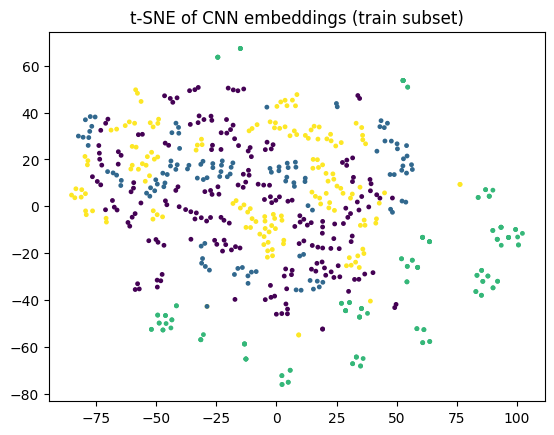

In [60]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1) scale (important)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

# 2) sample (t-SNE is slow)
rng = np.random.RandomState(42)
idx = rng.choice(len(X_train_s), size=min(2000, len(X_train_s)), replace=False)
X_s = X_train_s[idx]
y_s = y_train[idx]

# 3) t-SNE
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate="auto",
    init="pca",
    random_state=42
)
Z = tsne.fit_transform(X_s)

# 4) plot
plt.figure()
plt.scatter(Z[:, 0], Z[:, 1], c=y_s, s=6)
plt.title("t-SNE of CNN embeddings (train subset)")
plt.show()

# Hybrid + dimensionality reduction

In [22]:
from sklearn.decomposition import PCA, KernelPCA
num_components = [0.9,0.95,0.98]
for n in num_components:
    pipe_pca = make_pipeline(scaler, PCA(n_components=n), clf_svm_nl)
    pipe_pca.fit(X_train, y_train)
    print(f"\nPCA with {n} variance retained:")
    print(f"Number of components: {pipe_pca.named_steps['pca'].n_components_}")
    report_f1(pipe_pca, X_train, y_train, X_val, y_val)




PCA with 0.9 variance retained:
Number of components: 118
Train F1 (macro):    0.9981
Valid F1 (macro):    0.8612
Overfit gap (macro): 0.1369
Train F1 (weighted): 0.9984
Valid F1 (weighted): 0.8633
Overfit gap (wtd):   0.1350

PCA with 0.95 variance retained:
Number of components: 187
Train F1 (macro):    0.9981
Valid F1 (macro):    0.8495
Overfit gap (macro): 0.1486
Train F1 (weighted): 0.9984
Valid F1 (weighted): 0.8492
Overfit gap (wtd):   0.1492

PCA with 0.98 variance retained:
Number of components: 278
Train F1 (macro):    0.9981
Valid F1 (macro):    0.8495
Overfit gap (macro): 0.1486
Train F1 (weighted): 0.9984
Valid F1 (weighted): 0.8492
Overfit gap (wtd):   0.1492


In [24]:
num_components=[50,100,150,200,300,500]
for n in num_components:
    pipe_kpca = make_pipeline(scaler, KernelPCA(n_components=n, kernel='sigmoid'), clf_svm_nl)
    pipe_kpca.fit(X_train, y_train)
    print(f"\nKernel PCA with {n} variance retained:")
    report_f1(pipe_kpca, X_train, y_train, X_val, y_val)


Kernel PCA with 50 variance retained:
Train F1 (macro):    0.9967
Valid F1 (macro):    0.8676
Overfit gap (macro): 0.1290
Train F1 (weighted): 0.9967
Valid F1 (weighted): 0.8655
Overfit gap (wtd):   0.1313

Kernel PCA with 100 variance retained:
Train F1 (macro):    0.9981
Valid F1 (macro):    0.8869
Overfit gap (macro): 0.1112
Train F1 (weighted): 0.9984
Valid F1 (weighted): 0.8896
Overfit gap (wtd):   0.1087

Kernel PCA with 150 variance retained:
Train F1 (macro):    0.9981
Valid F1 (macro):    0.8782
Overfit gap (macro): 0.1199
Train F1 (weighted): 0.9984
Valid F1 (weighted): 0.8769
Overfit gap (wtd):   0.1215

Kernel PCA with 200 variance retained:
Train F1 (macro):    0.9981
Valid F1 (macro):    0.8823
Overfit gap (macro): 0.1158
Train F1 (weighted): 0.9984
Valid F1 (weighted): 0.8786
Overfit gap (wtd):   0.1198

Kernel PCA with 300 variance retained:
Train F1 (macro):    0.9981
Valid F1 (macro):    0.7970
Overfit gap (macro): 0.2011
Train F1 (weighted): 0.9984
Valid F1 (weighte